In [14]:
from keras import applications
from keras import models
from keras import layers
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
image_width = 224
image_height = 224

vgg_conv = applications.VGG16(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

In [3]:
# Freeze the layers except the last 2 layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.topology.InputLayer object at 0x000001D0A0A03B00> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0A03E80> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0A03C88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D0A0A03E10> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0A44780> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0A61DD8> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D0A0A76EB8> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0A8AF60> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0AA22E8> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0AB3978> False
<keras.layers.pooling.MaxPooling2D object at 0x000001D0A0ADEF28> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0AF2F60> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0B0A2E8> False
<keras.layers.convolutional.Conv2D object at 0x000001D0A0B1DB00> False
<keras.

In [4]:
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))

# model.add(layers.Dense(512, activation='relu'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(0.5))
# 
model.add(layers.Dense(5, activation='softmax', kernel_regularizer=regularizers.l2(0.0001)))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               6422784   
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 1285      
Total params: 21,139,781
Trainable params: 6,424,581
Non-trainable params: 14,715,200
________________________________________________________

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# Change the batchsize according to your system RAM
train_batchsize = 16
val_batchsize = 10
#train_dir = "D:/retinal_data_set_original/_1000_per_class_train/augmented_224/train"
train_dir = "D:/retinal_data_set_original/original/new_train"
#validation_dir = "D:/retinal_data_set_original/_1000_per_class_train/augmented_224/validation"
validation_dir = "D:/retinal_data_set_original/original/new_valid"
test_dir = "D:/retinal_data_set_original/original/new_test"

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_width, image_height),
        batch_size=train_batchsize,
        shuffle=True,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_width, image_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(image_width, image_height),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 8000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=1e-3),
              metrics=['acc'])

In [ ]:
model_check_point_loc = 'D:/retinal_data_set_visioncare/models/vgg16/vgg16_dr_epochs50.h5'
model_checkpoint = ModelCheckpoint(model_check_point_loc, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [7]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples//train_generator.batch_size,
      epochs=50,
      callbacks=[model_checkpoint],
      validation_data=validation_generator,
      validation_steps=validation_generator.samples//validation_generator.batch_size,
      verbose=1)
 
# Save the model
#model.save('D:/retinal_data_set_visioncare/models/vgg16/vgg16_dr_epochs50.h5')

Epoch 1/50
500/500 [==============================] - 565s 1s/step - loss: 1.2402 - acc: 0.5012 - val_loss: 0.9415 - val_acc: 0.6090
Epoch 2/50
500/500 [==============================] - 545s 1s/step - loss: 0.8679 - acc: 0.6430 - val_loss: 0.7826 - val_acc: 0.6950
Epoch 3/50
500/500 [==============================] - 546s 1s/step - loss: 0.7412 - acc: 0.7066 - val_loss: 0.8746 - val_acc: 0.6140
Epoch 4/50
500/500 [==============================] - 548s 1s/step - loss: 0.6467 - acc: 0.7480 - val_loss: 0.7158 - val_acc: 0.7030
Epoch 5/50
500/500 [==============================] - 547s 1s/step - loss: 0.5499 - acc: 0.7861 - val_loss: 0.7614 - val_acc: 0.6960
Epoch 6/50
500/500 [==============================] - 549s 1s/step - loss: 0.5227 - acc: 0.7969 - val_loss: 0.6013 - val_acc: 0.7770
Epoch 7/50
500/500 [==============================] - 546s 1s/step - loss: 0.4865 - acc: 0.8141 - val_loss: 0.5829 - val_acc: 0.7660
Epoch 8/50
500/500 [==============================] - 547s 1s/step - 

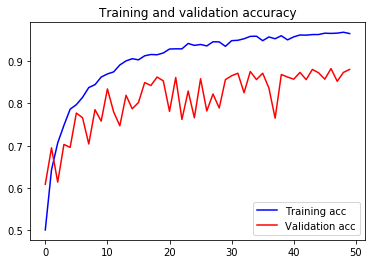

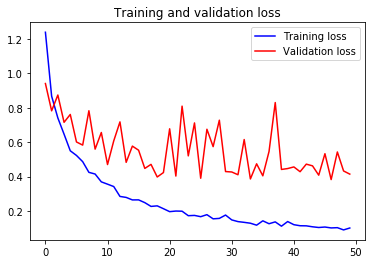

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [16]:
#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // validation_generator.batch_size)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = ['non-dr', 'mild-npdr', 'moderate-npdr', 'severe-npdr', 'pdr']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))


Confusion Matrix
[[148  38  11   3   0]
 [  7 182   7   3   1]
 [  1   9 178   6   6]
 [  0  14  13 172   1]
 [  0   0   0   0 200]]
Classification Report
               precision    recall  f1-score   support

       non-dr       0.95      0.74      0.83       200
    mild-npdr       0.75      0.91      0.82       200
moderate-npdr       0.85      0.89      0.87       200
  severe-npdr       0.93      0.86      0.90       200
          pdr       0.96      1.00      0.98       200

  avg / total       0.89      0.88      0.88      1000



In [18]:
#Confution Matrix and Classification Report for testset
Y_pred_for_test = model.predict_generator(test_generator, test_generator.samples // test_generator.batch_size)
Y_pred_for_test = np.argmax(Y_pred_for_test, axis=1)
print('Confusion Matrix for testset')
print(confusion_matrix(test_generator.classes, Y_pred_for_test))
print('Classification Report')
target_names = ['non-dr', 'mild-npdr', 'moderate-npdr', 'severe-npdr', 'pdr']
print(classification_report(test_generator.classes, Y_pred_for_test, target_names=target_names))

Confusion Matrix for testset
[[146  39  14   1   0]
 [ 15 173   8   4   0]
 [  3  16 171   9   1]
 [  1  11  14 169   5]
 [  0   0   0   0 200]]
Classification Report
               precision    recall  f1-score   support

       non-dr       0.88      0.73      0.80       200
    mild-npdr       0.72      0.86      0.79       200
moderate-npdr       0.83      0.85      0.84       200
  severe-npdr       0.92      0.84      0.88       200
          pdr       0.97      1.00      0.99       200

  avg / total       0.87      0.86      0.86      1000

